In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

In [2]:
from solardatatools import DataHandler
from solardatatools.solar_noon import energy_com
from solardatatools.signal_decompositions import tl1_l1d1_l2d2p365 as cvx_sd
from solardatatools.signal_decompositions_l2norm import tl1_l1d1_l2d2p365 as cvx_sd_l2norm
from solardatatools.algorithms.capacity_change import CapacityChange

In [3]:
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
path = "./cassandra/*.csv"

# NOTE: cannot run these tests comparing w/ l2norm w/o adjusting CapacityChange to switch between the two versions

# Checking DataHandler vs external
# DO NOT RERUN!

0.0005081770942077492


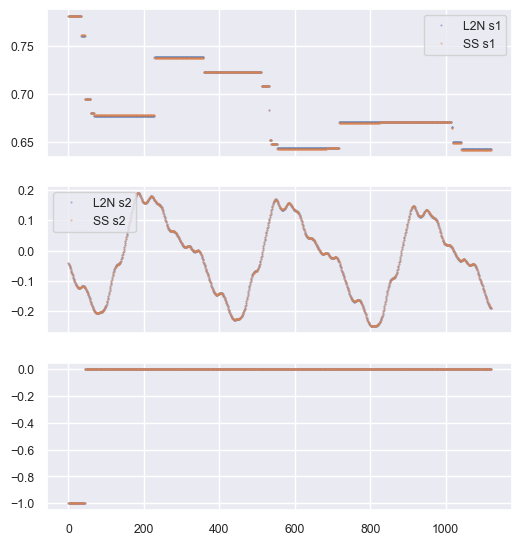

In [72]:
fname = "./cassandra/TACHC1022158.csv"
df = pd.read_csv(fname)
data = df["meas_val_f"] 
dh = DataHandler(df, convert_to_ts=True)
dh.l2norm = True
dh.cc_c2 = 100
dh.run_pipeline(verbose=False)


dh2 = DataHandler(df, convert_to_ts=True)
dh2.l2norm = False
dh2.cc_c2 = 6561
dh2.run_pipeline(verbose=False)

print(mae(dh.capacity_analysis.s1, dh2.capacity_analysis.s1))
      
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,6.5))
ax1.plot(dh.capacity_analysis.s1, label="L2N s1", ls="none", marker=".", alpha=0.5, markersize=1)
ax1.plot(dh2.capacity_analysis.s1, label="SS s1", ls="none", marker=".", alpha=0.5, markersize=1)

ax2.plot(dh.capacity_analysis.s2, label="L2N s2", ls="none", marker=".", alpha=0.5, markersize=1)
ax2.plot(dh2.capacity_analysis.s2, label="SS s2", ls="none", marker=".", alpha=0.5, markersize=1)


ax3.plot(dh.capacity_analysis.labels, label="L2N clusters", ls="none", marker=".", alpha=0.5, markersize=1)
ax3.plot(dh2.capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)


ax1.legend()
ax2.legend()
plt.show()

total time: 19.95 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              17.11s
Cleaning                   0.87s
Filtering/Summarizing      1.97s
    Data quality           0.36s
    Clear day detect       0.71s
    Clipping detect        0.11s
    Capacity change detect 0.80s

ss
total time: 28.69 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              17.82s
Cleaning                   0.74s
Filtering/Summarizing      10.14s
    Data quality           0.39s
    Clear day detect       0.69s
    Clipping detect        0.11s
    Capacity change detect 8.95s



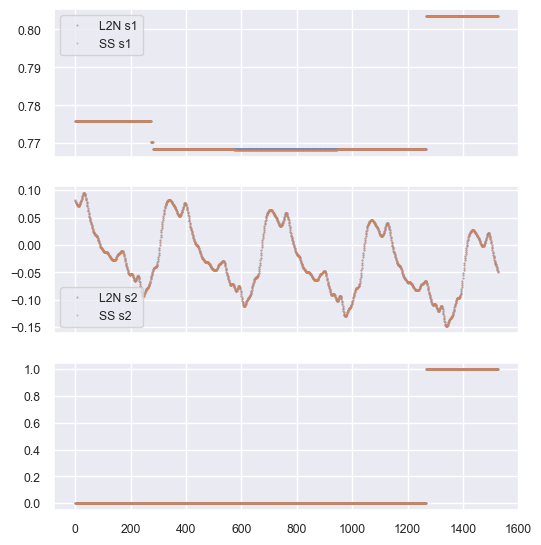

In [63]:
fname = "./cassandra/TACIC1066981.csv"

df = pd.read_csv(fname)
data = df["meas_val_f"] 
dh = DataHandler(df, convert_to_ts=True)
dh.l2norm = True
dh.cc_c2 = 100
dh.run_pipeline(verbose=True, daytime_threshold=0.005)


print("ss")
dh2 = DataHandler(df, convert_to_ts=True)
dh2.l2norm = False
dh2.cc_c2 = 6561
dh2.run_pipeline(verbose=True, daytime_threshold=0.005)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,6.5))
ax1.plot(dh.capacity_analysis.s1, label="L2N s1", ls="none", marker=".", alpha=0.5, markersize=1)
ax1.plot(dh2.capacity_analysis.s1, label="SS s1", ls="none", marker=".", alpha=0.5, markersize=1)

ax2.plot(dh.capacity_analysis.s2, label="L2N s2", ls="none", marker=".", alpha=0.5, markersize=1)
ax2.plot(dh2.capacity_analysis.s2, label="SS s2", ls="none", marker=".", alpha=0.5, markersize=1)


ax3.plot(dh.capacity_analysis.labels, label="L2N clusters", ls="none", marker=".", alpha=0.5, markersize=1)
ax3.plot(dh2.capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)


ax1.legend()
ax2.legend()
plt.show()

# Check all w/ median weight = 6561

./cassandra/TACHC1022158.csv


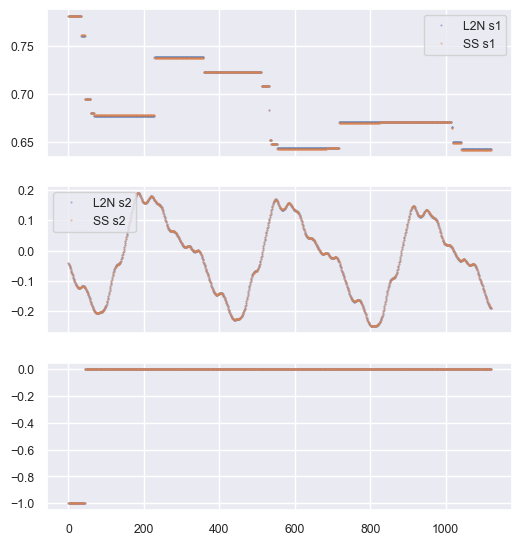

./cassandra/TACIC1066981.csv


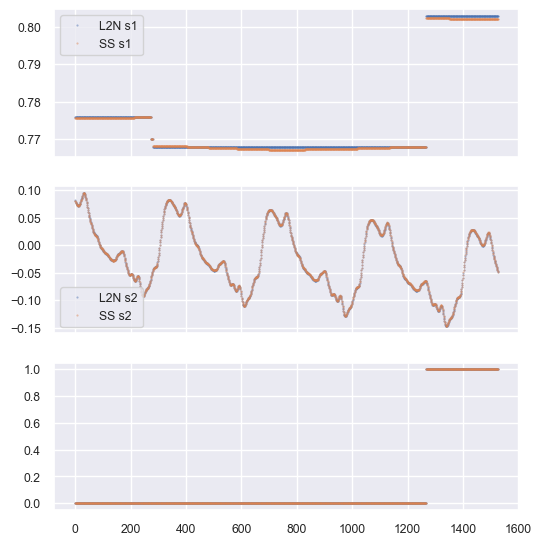

./cassandra/TADKC1095559.csv


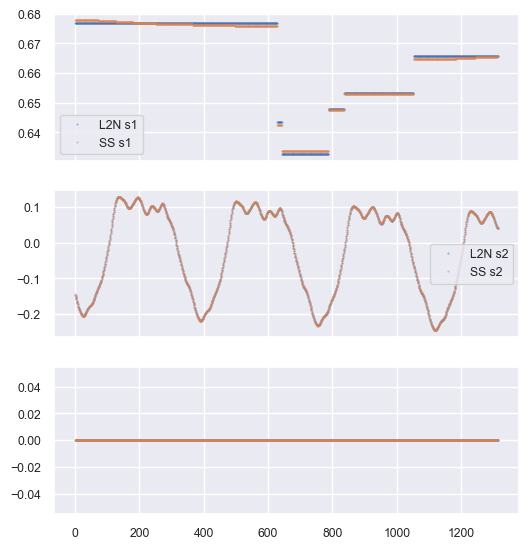

./cassandra/TADBC1077912.csv


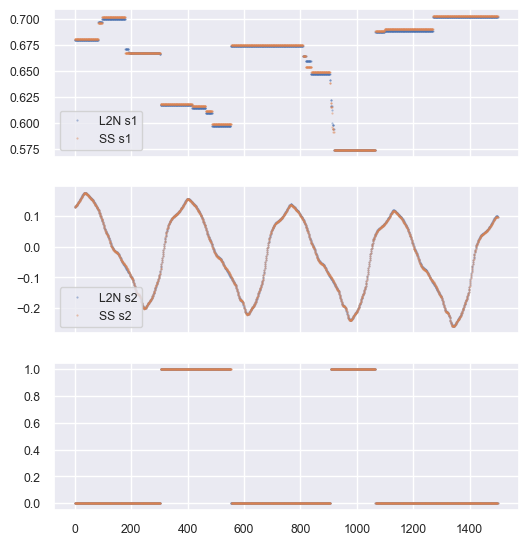

./cassandra/TADKC1094999.csv


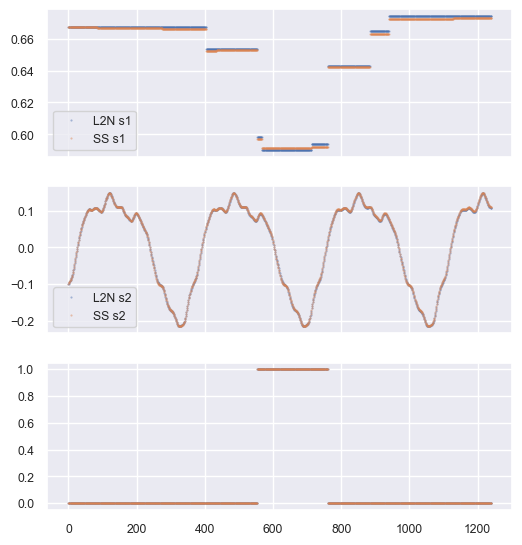

In [73]:
# w/o specifying mosek as solver
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.l2norm = True
    dh.cc_c2 = 100
    dh.run_pipeline(verbose=False)


    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False
    dh2.cc_c2 = 6561
    dh2.run_pipeline(verbose=False)

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(dh.capacity_analysis.s1, label="L2N s1", ls="none", marker=".", alpha=0.5, markersize=1)
    ax1.plot(dh2.capacity_analysis.s1, label="SS s1", ls="none", marker=".", alpha=0.5, markersize=1)

    ax2.plot(dh.capacity_analysis.s2, label="L2N s2", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(dh2.capacity_analysis.s2, label="SS s2", ls="none", marker=".", alpha=0.5, markersize=1)


    ax3.plot(dh.capacity_analysis.labels, label="L2N clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax3.plot(dh2.capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)


    ax1.legend()
    ax2.legend()
    plt.show()

./cassandra/TACHC1022158.csv


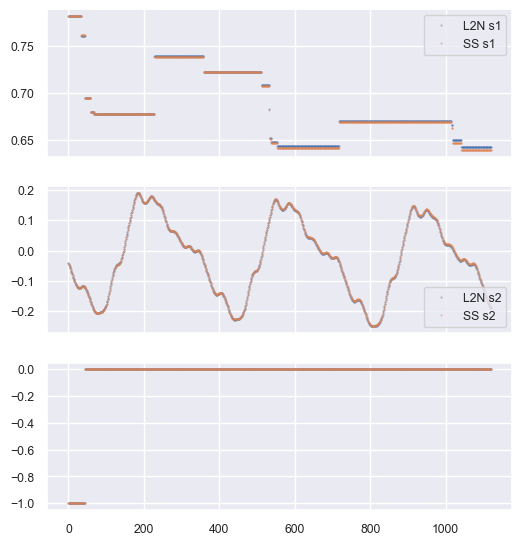

./cassandra/TACIC1066981.csv


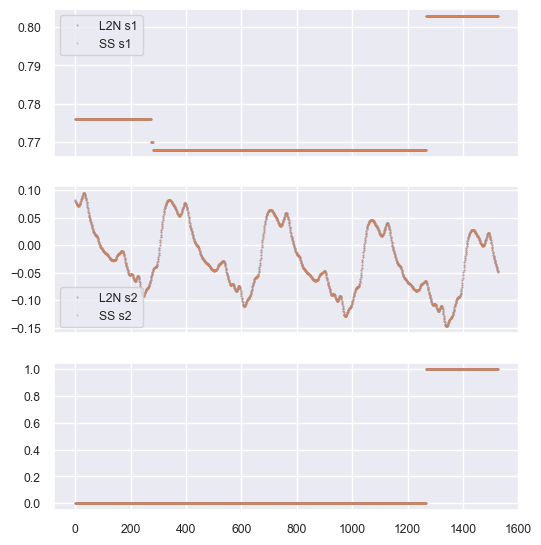

./cassandra/TADKC1095559.csv


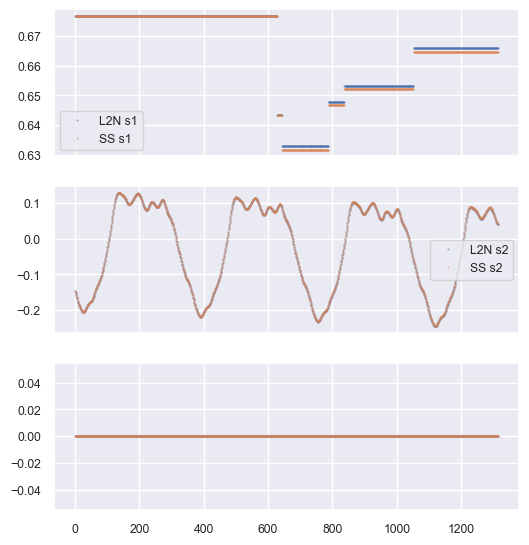

./cassandra/TADBC1077912.csv


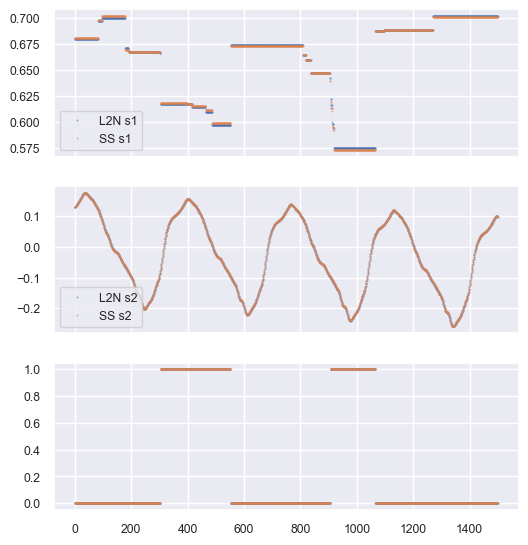

./cassandra/TADKC1094999.csv


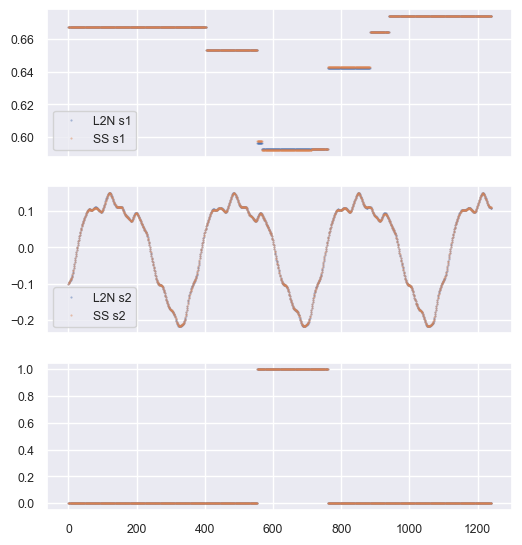

In [74]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.l2norm = True
    dh.cc_c2 = 100
    dh.run_pipeline(verbose=False, solver="MOSEK")


    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False
    dh2.cc_c2 = 6561
    dh2.run_pipeline(verbose=False, solver="MOSEK")

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,6.5))
    ax1.plot(dh.capacity_analysis.s1, label="L2N s1", ls="none", marker=".", alpha=0.5, markersize=1)
    ax1.plot(dh2.capacity_analysis.s1, label="SS s1", ls="none", marker=".", alpha=0.5, markersize=1)

    ax2.plot(dh.capacity_analysis.s2, label="L2N s2", ls="none", marker=".", alpha=0.5, markersize=1)
    ax2.plot(dh2.capacity_analysis.s2, label="SS s2", ls="none", marker=".", alpha=0.5, markersize=1)


    ax3.plot(dh.capacity_analysis.labels, label="L2N clusters", ls="none", marker=".", alpha=0.5, markersize=1)
    ax3.plot(dh2.capacity_analysis.labels, label="SS clusters", ls="none", marker=".", alpha=0.5, markersize=1)


    ax1.legend()
    ax2.legend()
    plt.show()

#  =======================

# Check linear term 

./cassandra/TAAI01129193.csv
Clear day detection failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 361, in run_pipeline
    self.detect_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 982, in detect_clear_days
    clear_days = find_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/clear_day_detection.py", line 55, in find_clear_days
    y = tl1_l2d2p365(tc, tau=0.9, c1=3352924, yearly_periodic=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 138, in tl1_l2d2p365
    problem.solve(solver=solver, verbose=verbose)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 493, in solve
    return solve_func(self, *args, **kwargs)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site

total time: 25.64 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              9.71s
Cleaning                   0.51s
Filtering/Summarizing      15.42s
    Data quality           0.43s
    Clear day detect       1.19s
    Clipping detect        0.12s
    Capacity change detect 13.67s



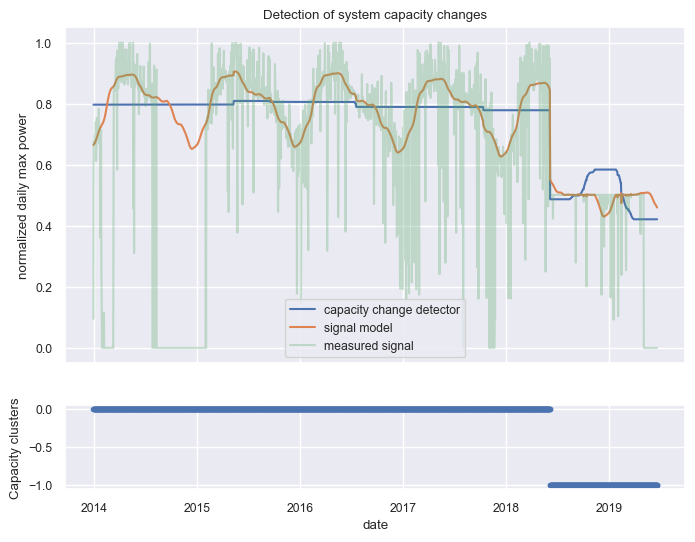

./cassandra/TACHC1022158.csv
total time: 10.96 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.70s
Cleaning                   0.26s
Filtering/Summarizing      6.00s
    Data quality           0.23s
    Clear day detect       1.20s
    Clipping detect        0.14s
    Capacity change detect 4.43s



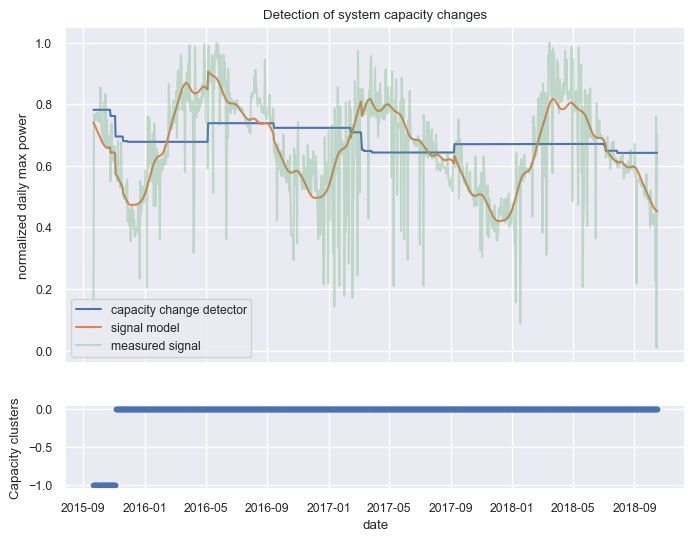

./cassandra/TACIC1066981.csv
Clear day detection failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 361, in run_pipeline
    self.detect_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 982, in detect_clear_days
    clear_days = find_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/clear_day_detection.py", line 55, in find_clear_days
    y = tl1_l2d2p365(tc, tau=0.9, c1=3352924, yearly_periodic=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 138, in tl1_l2d2p365
    problem.solve(solver=solver, verbose=verbose)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 493, in solve
    return solve_func(self, *args, **kwargs)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site

total time: 18.13 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              7.45s
Cleaning                   0.38s
Filtering/Summarizing      10.30s
    Data quality           0.38s
    Clear day detect       0.95s
    Clipping detect        0.13s
    Capacity change detect 8.84s



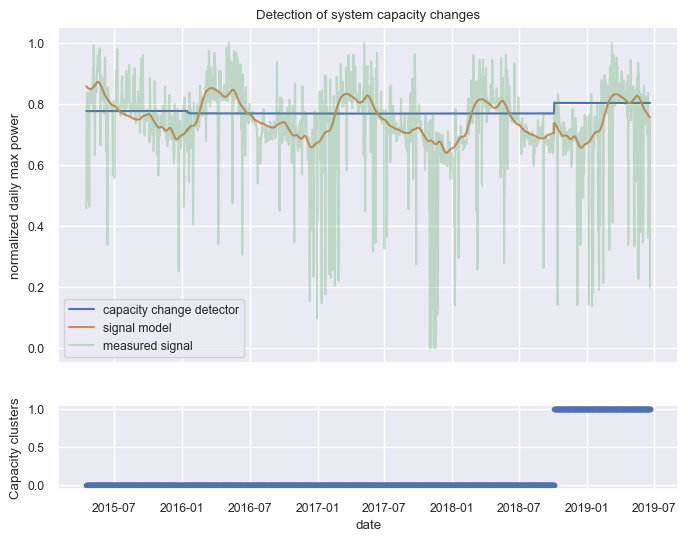

./cassandra/TADKC1095559.csv
total time: 10.13 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.17s
Cleaning                   0.33s
Filtering/Summarizing      7.64s
    Data quality           0.25s
    Clear day detect       1.48s
    Clipping detect        0.08s
    Capacity change detect 5.83s



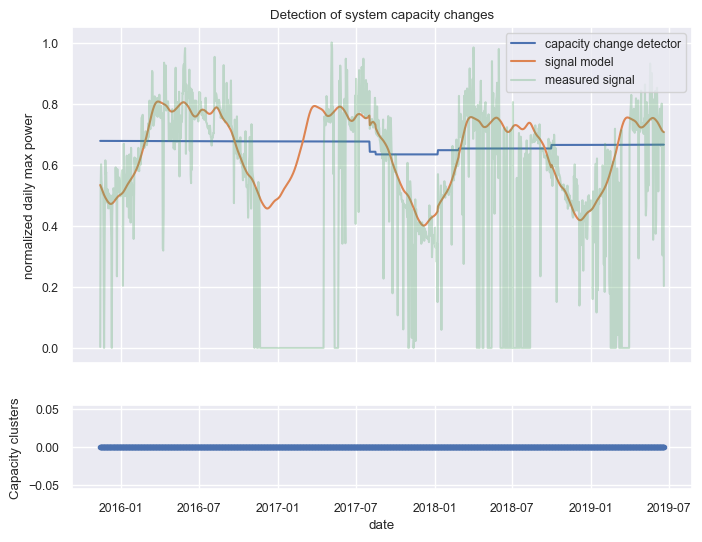

./cassandra/TADBC1077912.csv
total time: 15.58 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              6.61s
Cleaning                   0.31s
Filtering/Summarizing      8.66s
    Data quality           0.28s
    Clear day detect       1.47s
    Clipping detect        0.08s
    Capacity change detect 6.83s



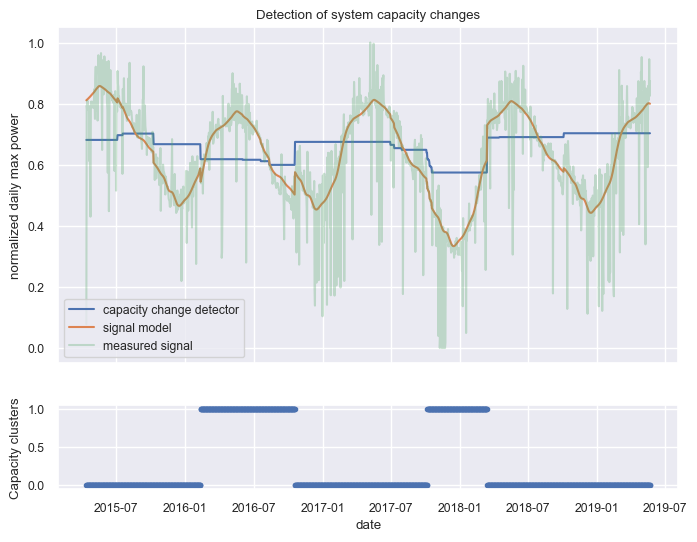

./cassandra/TADKC1094999.csv
total time: 10.09 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.60s
Cleaning                   0.25s
Filtering/Summarizing      7.25s
    Data quality           0.24s
    Clear day detect       1.15s
    Clipping detect        0.07s
    Capacity change detect 5.78s



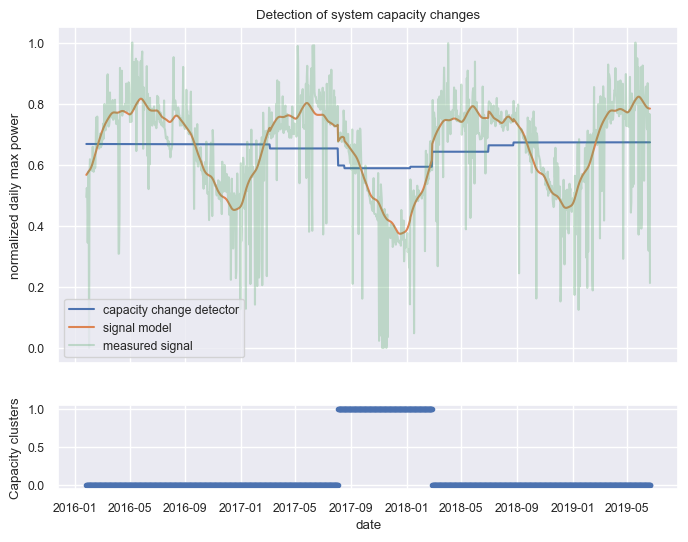

In [6]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=True)

    dh.plot_capacity_change_analysis()
    plt.show()

# W/o linear term

./cassandra/TACHC1022158.csv
total time: 7.26 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.86s
Cleaning                   0.27s
Filtering/Summarizing      2.13s
    Data quality           0.21s
    Clear day detect       1.14s
    Clipping detect        0.12s
    Capacity change detect 0.66s



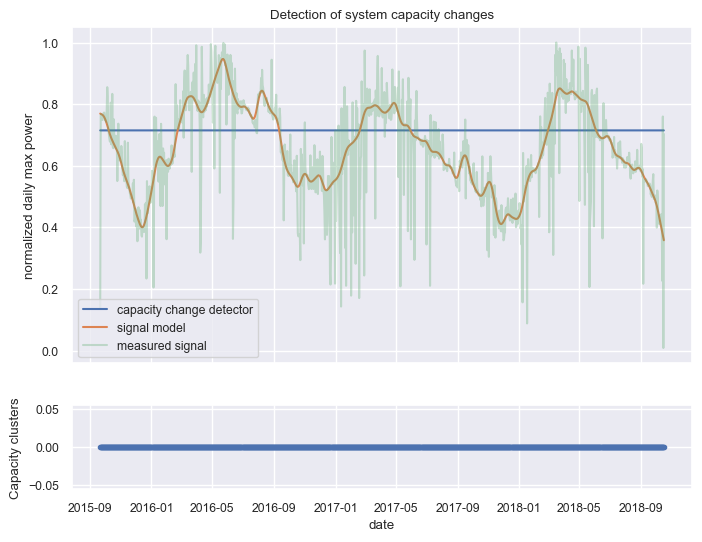

./cassandra/TACIC1066981.csv
Clear day detection failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 363, in run_pipeline
    self.detect_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 984, in detect_clear_days
    clear_days = find_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/clear_day_detection.py", line 54, in find_clear_days
    y = tl1_l2d2p365(tc, tau=0.9, c1=3352924, yearly_periodic=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 178, in tl1_l2d2p365
    problem.solve(solver=solver, verbose=verbose)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 493, in solve
    return solve_func(self, *args, **kwargs)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site

total time: 9.96 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              7.20s
Cleaning                   0.36s
Filtering/Summarizing      2.40s
    Data quality           0.35s
    Clear day detect       0.91s
    Clipping detect        0.10s
    Capacity change detect 1.03s



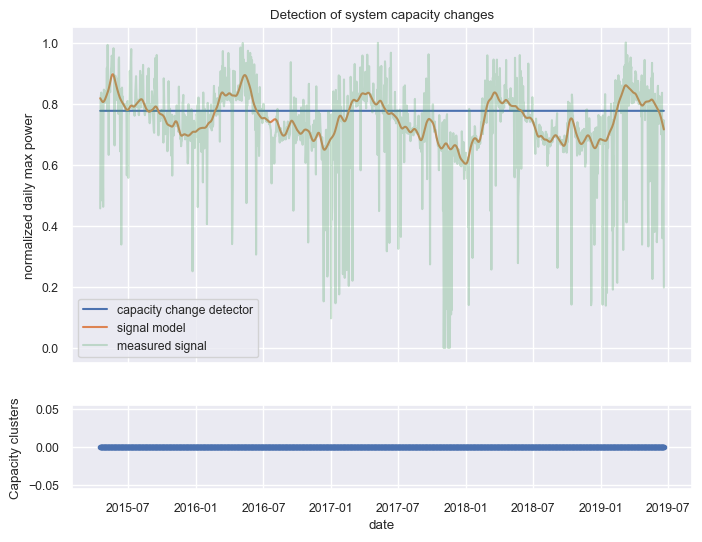

./cassandra/TADKC1095559.csv
total time: 5.28 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.24s
Cleaning                   0.32s
Filtering/Summarizing      2.73s
    Data quality           0.28s
    Clear day detect       1.51s
    Clipping detect        0.08s
    Capacity change detect 0.86s



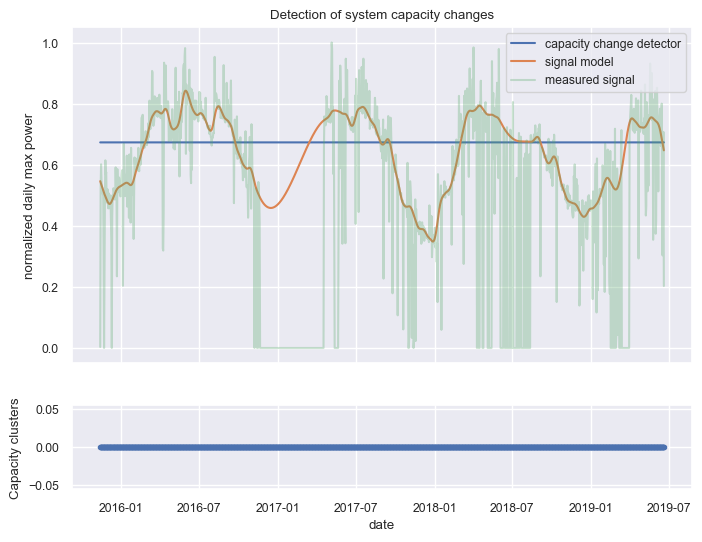

./cassandra/TADBC1077912.csv
total time: 10.16 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              6.91s
Cleaning                   0.33s
Filtering/Summarizing      2.93s
    Data quality           0.29s
    Clear day detect       1.46s
    Clipping detect        0.08s
    Capacity change detect 1.09s



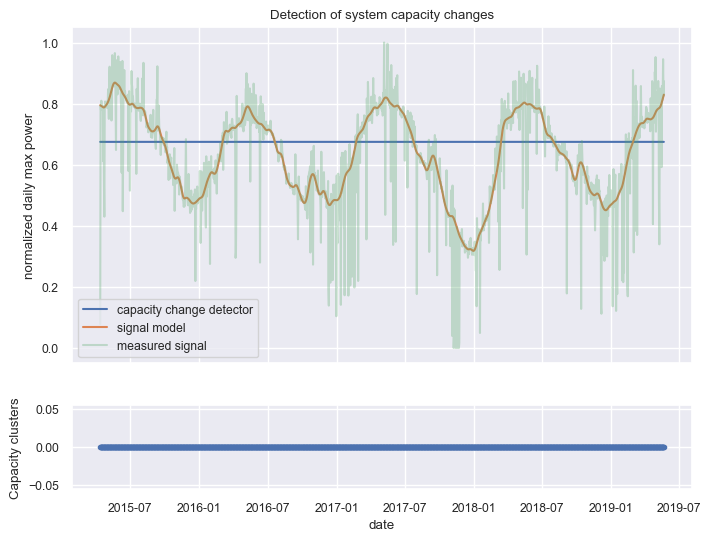

./cassandra/TADKC1094999.csv
total time: 5.45 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.87s
Cleaning                   0.25s
Filtering/Summarizing      2.33s
    Data quality           0.29s
    Clear day detect       1.24s
    Clipping detect        0.08s
    Capacity change detect 0.72s



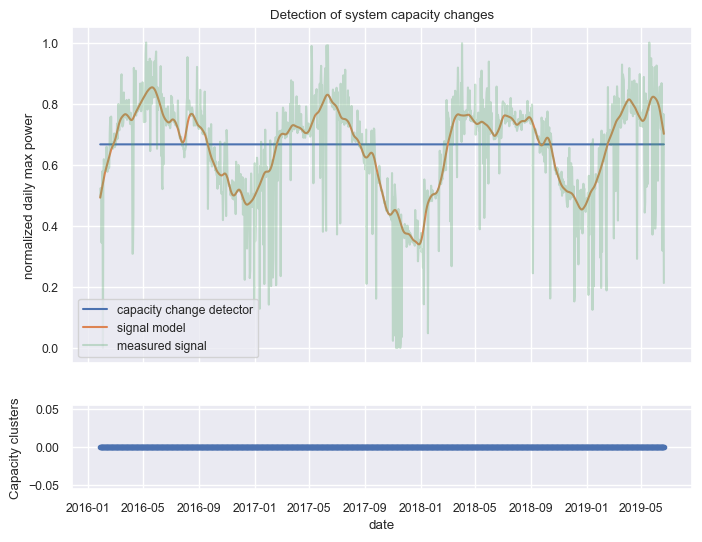

In [18]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    data = df["meas_val_f"] 
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(verbose=True)

    dh.plot_capacity_change_analysis()
    plt.show()